In [224]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
pd.set_option("display.max_columns", None)
sns.set(style = "white")

In [217]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 7.]

In [3]:
battles = pd.read_csv("datasets/battles.csv")
battles.head()

## The King who Fought the Most Battles

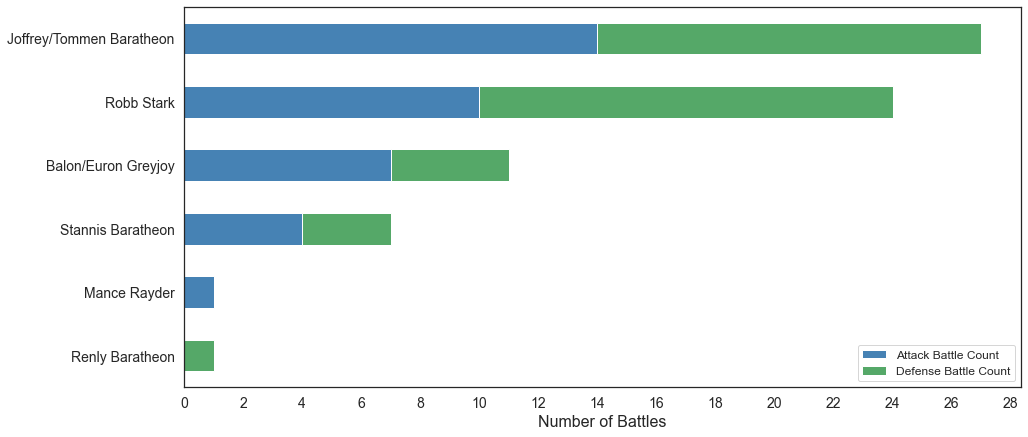

In [222]:
attacker = pd.DataFrame(battles.attacker_king.value_counts())
defender = pd.DataFrame(battles.defender_king.value_counts())
data = attacker.merge(defender, how = "outer", left_index = True, right_index = True).fillna(0)
data.loc[:, "Sum"] = data.attacker_king + data.defender_king
p = data.sort_values(["Sum", "attacker_king"]).loc[:, ["attacker_king", "defender_king"]].plot.barh(rot = 0, stacked = True, color = ["steelblue", sns.color_palette()[2]])
plt.xticks(np.arange(0, max(data.Sum) + 2, 2))
_ = p.set(xlabel = "Number of Battles"), p.legend(["Attack Battle Count", "Defense Battle Count"])

King Joffrey/Tommen Baratheon fought the most battles. They were also the king who attacked the most.

## Top Rivalries

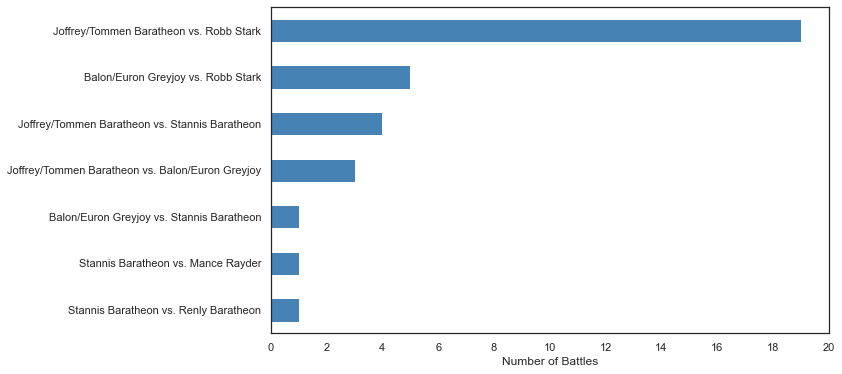

In [227]:
temp = battles.dropna(subset = ["attacker_king", "defender_king"]).copy(deep = True)
c = list(Counter([tuple(set(x)) for x in temp[["attacker_king", "defender_king"]].values if len(set(x)) > 1]).items())
data = pd.DataFrame(c).sort_values(1)
p = data.plot.barh(color = "steelblue", figsize = (10, 6))
p.set(yticklabels = ["%s vs. %s" % (x[0], x[1]) for x in data[0]], xlabel = "Number of Battles")
plt.xticks(np.arange(0, max(data[1]) + 2, 2))
p.legend().remove()

More than half of the battles were between Joffrey/Tommen Baratheon and Robb Stark.

## Most Aggressive House

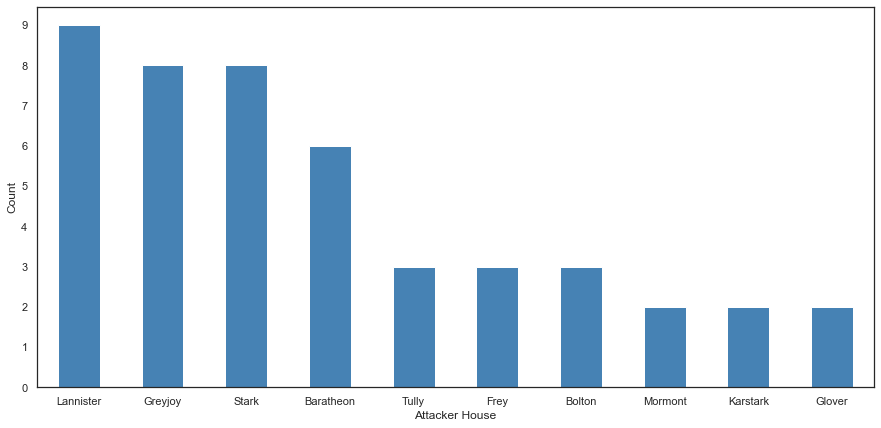

In [226]:
d = {}
for column in ["attacker_1", "attacker_2", "attacker_3", "attacker_4"]:
    val_count = battles[column].value_counts()
    for index, value in val_count.items():
        d[index] = d.get(index, 0) + value

data = pd.DataFrame.from_dict(d, orient = "index", columns = ["Count"]).sort_values("Count", ascending = False)
p = data.loc[data.Count > 1].Count.plot.bar(rot = 0, color = "steelblue")
plt.yticks(np.arange(0, max(data.Count) + 1, 1))
_ = p.set(xlabel = "Attacker House", ylabel = "Count")

The Lannisters, Greyjoys, and the Starks are among the most aggressive houses (houses that attacked most often).

## Attacker Advantage

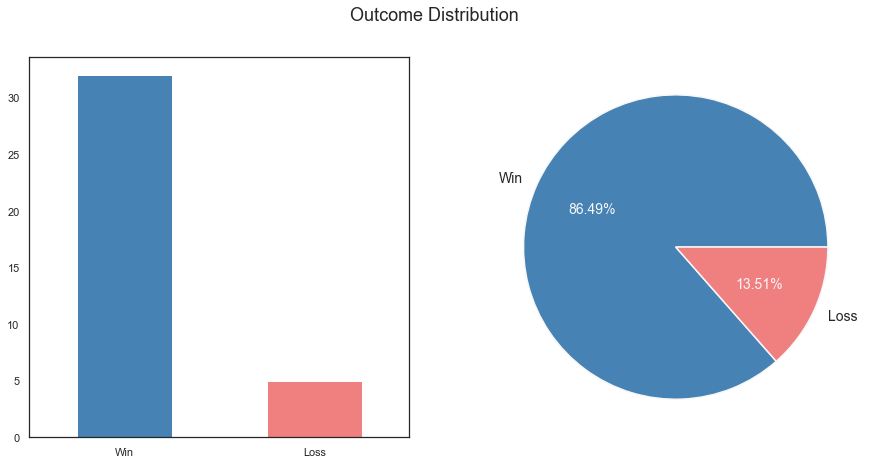

In [230]:
data = battles.loc[battles.attacker_outcome.notna()].copy(deep = True)
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Outcome Distribution", fontsize = 18.)
_ = data.attacker_outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = ["steelblue", "lightcoral"]).set(xticklabels = ["Win", "Loss"])
_ = data.attacker_outcome.value_counts().plot.pie(labels = ("Win", "Loss"), autopct = "%.2f%%", label = "", fontsize = 14., ax = ax[1],\
colors = ["steelblue", "lightcoral"], wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

As one may observe, the vast majority of attackers won the battle. Due to the slow communication and limited military information in the *Game of Thrones* world, the attacker advantage seems to be significant.

## Impact of Army Size on Battle Outcome

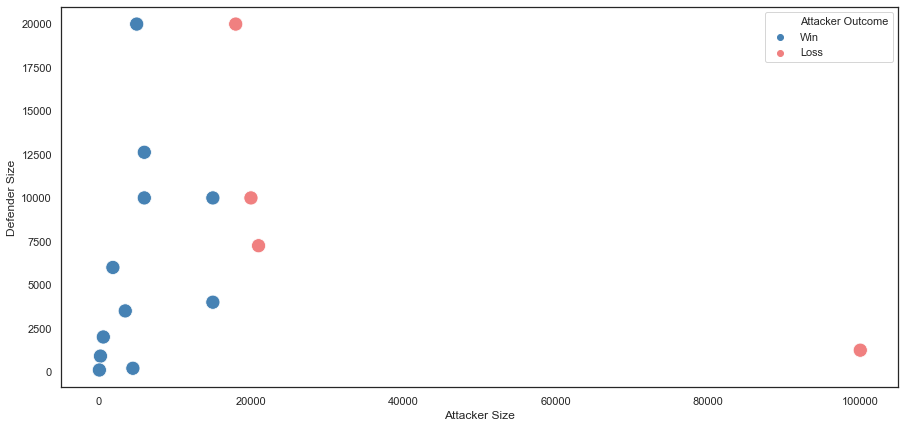

In [231]:
data = battles.dropna(subset = ["attacker_size", "defender_size", "attacker_outcome"]).copy(deep = True)
p = sns.scatterplot("attacker_size", "defender_size", hue = "attacker_outcome", palette = ["steelblue", "lightcoral"], data = data, s = 200)
_ = p.set(xlabel = "Attacker Size", ylabel = "Defender Size")
legend = p.legend()
legend.texts[0].set_text("Attacker Outcome")
legend.texts[1].set_text("Win")
legend.texts[2].set_text("Loss")

The bottom right point seems surprising--how could the attacker lose with such an enormous army size? Let's take a closer look at this battle.

In [7]:
data.loc[data.attacker_size == max(data.attacker_size)]

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
27,Battle of Castle Black,300,28,Stannis Baratheon,Mance Rayder,Free folk,Thenns,Giants,NaN,Night's Watch,Baratheon,NaN,NaN,loss,siege,1.0,1.0,100000.0,1240.0,"Mance Rayder, Tormund Giantsbane, Harma Dogshe...","Stannis Baratheon, Jon Snow, Donal Noye, Cotte...",0.0,Castle Black,Beyond the Wall,NaN


According to [Game of Thrones Wiki](https://gameofthrones.fandom.com/wiki/Battle_of_Castle_Black), the 100,000 undisciplined wildlings were only expecting attacks from the Night's Watch and left their eastern flank totally undefended. Stannis's army took the wildlings by complete surprise and quickly finished the battle by capturing Mance Rayder. 

Notice the *attacker_king* and *defender_king* should be switched for this row. The attacker king should be Mance Rayder and the defender king should be Stannis Baratheon. Fortunately, this error does not affect previous analyses.

In [8]:
battles.loc[27, "attacker_king"] = "Mance Rayder"
battles.loc[27, "defender_king"] = "Stannis Baratheon"